 # ПРОЕКТНАЯ РАБОТА

ЗАКАЗЧИК: Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры.

ЦЕЛЬ: Выявить определяющие успешность игры закономерности. что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

ДАННЫЕ: Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 

ОПИСАНИЕ ДАННЫХ: 

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Загрузка данных и подготовка их к анализу.

###  *Загрузить данные.*

In [1]:
#импорт библиотек

import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math
import scipy.stats as stats


In [2]:
#чтение файлов с данными и сохранение в соответствующую переменную
data = pd.read_csv('/datasets/games.csv') 

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замена названия столбцов.

In [4]:
# приведем названия столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)

In [5]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

###  *Проверка типа данных.*

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Анализируя данные и тип столбца пришли к выводу, что необходимо преобразовать данные в нужные типы по следующим столбцам:

- year_of_release (год выпуска) перевести в тип data
- user_score (оценка пользователей (максимум 10)) - в тип float64


In [10]:
# # ещё раз посмотрим, что data['year_of_release'] у нас float

data['year_of_release'].dtypes

dtype('float64')

In [88]:
# # удалим записи у которых в 'year_of_release' пусто (без этого конвертация в int будет невозможна)
# # 
# # если бы у нас была какая-то хорошая методика заполнения пропусков - заполнили бы года. Но в нашем случае только удаление.

data.dropna(subset=['year_of_release'], inplace=True)

In [89]:
# # приводим к int

data['year_of_release'] = data['year_of_release'].astype('int')

In [90]:
# # видим, что data['year_of_release'] теперь int

data['year_of_release'].dtypes

dtype('int64')

In [91]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,nan,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,nan,31.38


##### Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение.

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

  Аббревиатура 'tbd' - to be determined (перевод: предстоит определить). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. То есть пользователь просто не знал как оценить и оставил этот пункт без ответа, поставив значение 'tbd', оставив возможность вернуться к этому вопросу. 
  Учитывая наши условия: мы не знаем вернулся ли пользователь к заполнению этого показателя или нет, мы имеем готовые данные, поэтому, в данном случае, можно принять значение 'tbd' за "заглушку" пропусков. 

Подсчитаем количество строк в таблице с указанием оценки пользователя - 'tbd'.

In [17]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2424

Количество строк большое, удалять - опасно, поэтому заменим его "заглушкой" - nan: такого рейтинга нет, и это значение не будет "портить" нам общий тип данных столбца.

In [18]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype(float)

In [19]:
#проверка
data.loc[data['user_score'] == 'nan', 'user_score'].count()

0

In [20]:
#преобразование типа оценка пользователей в числовой

data['user_score'] = pd.to_numeric(data['user_score'])
                                   #, errors='coerce') 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Проверим наличие пропусков и в каких столбцах. Если доля пропусков от 5-15%% - их необходимо проработать.  


In [22]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,54.590000


In [23]:
data.loc[data['critic_score'].isna(), 'critic_score'] = 'nan'

In [24]:
data.loc[data['user_score'].isna(), 'user_score'] = 'nan'

In [25]:
data.loc[data['rating'].isna(), 'rating'] = 'nan'

In [26]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


Обнаружено большое количество пропусков в столбцах:
- critic_score (оценка критиков (максимум 100))
- user_score (оценка пользователей (максимум 10))
- rating (рейтинг от организации ESRB)

Скорее всего причина пропусков - не заполнение данных показателей. Количество пропусков большое - удалять опасно, поэтому решили заменить "заглушкой" nan.

### Обработка дубликатов

In [27]:
#подсчет явных дубликатов
data.duplicated().sum()

0

Проверка показала, что в данных отсутствуют явные дубликаты.

In [28]:
data['rating'].value_counts()

nan     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [29]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Проверка категориальных данных столбца 'rating' - так же не выдало ошибок в данных.

### Суммарные продажи в регионах.

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [30]:
#найдем сумму продаж по всем регионам
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [31]:
data['total_sales'] = \
data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

In [32]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,nan,nan,nan,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,nan,31.38


## Исследовательский анализ данных.

### Количество игр по годам.

Посмотрим, сколько игр выпускалось в разные годы. 

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,nan,nan,nan,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,nan,31.38


In [34]:
data_name = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
data_name

,name
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


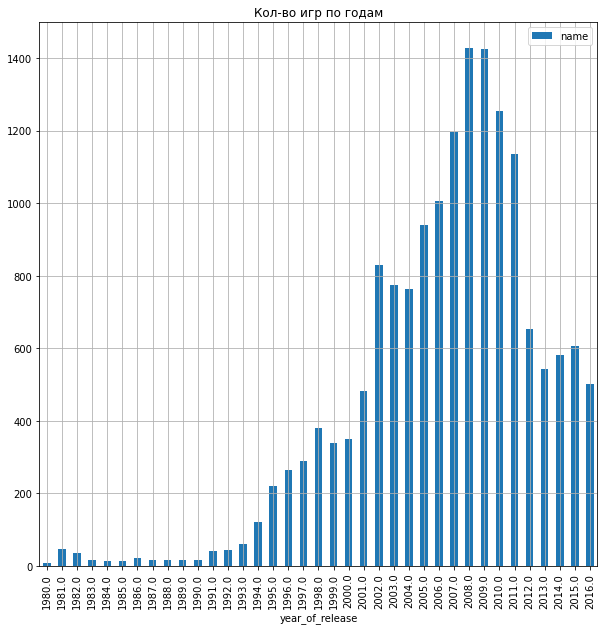

In [35]:
data_name.plot(y='name', kind='bar', grid=True, figsize=(10, 10))
plt.title('Кол-во игр по годам')
plt.show()


По графику видно, что лидеры по выпуску игр - это 2008 и 2009 годы. Начиная с 1991 года количество игр до 2008 года колеблется, но имеет тенденцию роста. А вот с 2009 года - заметна тенденция уменьшения количества выпускаемых игр.

### Анализ платформ.

Посмотрим как менялись продажи по платформам.

#### Построим суммарное количество продаж в разбивке по платформам и найдем среди них топ-5 лидеров.

In [36]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,nan,nan,nan,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,nan,31.38


In [37]:
data.pivot_table(
    index='platform', values='total_sales', aggfunc= 'sum')\
.sort_values('total_sales', ascending=False)


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [38]:
#найдем топ-5
tmp = data.pivot_table(index='platform', values='total_sales', aggfunc= 'sum').sort_values('total_sales', ascending=False)
tmp.index[:5].tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Такие платформы:

- PS2	
- X360	
- PS3	
- Wii	
- DS

Показали самые высокие продажи и их мы отнесем в ТОП-5 лидеров платформ по продажам.

Проанализируем распределение ТОП-5 платформ по годам.

In [39]:
#создадим срез данных по ТОП-5 платформам
list = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
data.query('platform in @list').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


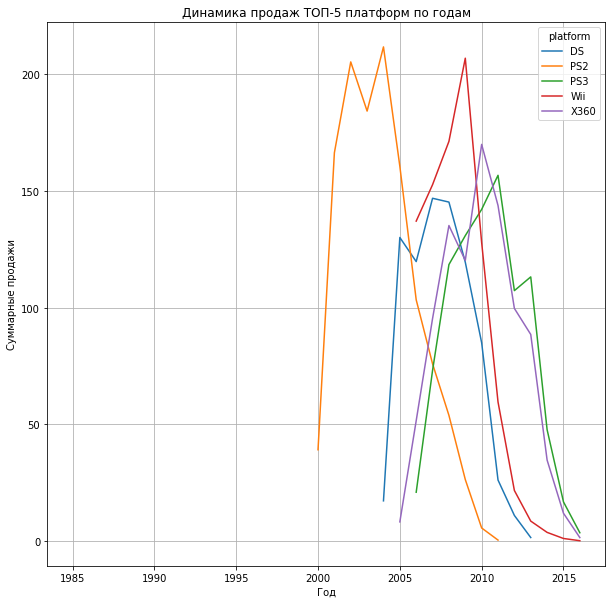

In [40]:
data.query('platform in @list')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(grid=True, figsize=(10, 10))
plt.ylabel('Суммарные продажи')
plt.xlabel('Год')
plt.title('Динамика продаж ТОП-5 платформ по годам')
plt.show()

По графикам можно примерно оценить период "успешности" платформы - 4-5 лет, то есть это период когда продажи по платформам растут и достигают своего пика. Делая прогноз на 2017 год, приходим к выводу, что платформы, которые запустили в 2013 году - 2017 должны достичь своего пика. Поэтому актуальный период определим с 2013-2017 гг.

Создадим срез основного датафрейма с актуальным периодом данных, то есть после 2013 года, и сохраним его в переменной data_2013 и дальнейшей анализ будем проводить на этом датафрейме.

In [41]:
data_2013 = data.query('year_of_release >= 2013')
data_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,nan,nan,nan,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,nan,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


#### Какие платформы лидируют по продажам, растут или падают? 

Выберем топ-5 прибыльных по продажам платформ заново, исходя из данных нового датафрейма.

In [42]:
tmp_2013 = data_2013.pivot_table(index='platform', \
values='total_sales', aggfunc= 'sum').sort_values('total_sales', ascending=False)
tmp_2013.index[:5].tolist()

['PS4', 'PS3', 'XOne', '3DS', 'X360']

Итак, в актуальном периоде список ТОП-5 платформ по продажам изменился, теперь лидерами являются: ['PS4', 'PS3', 'XOne', '3DS', 'X360'].

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:>

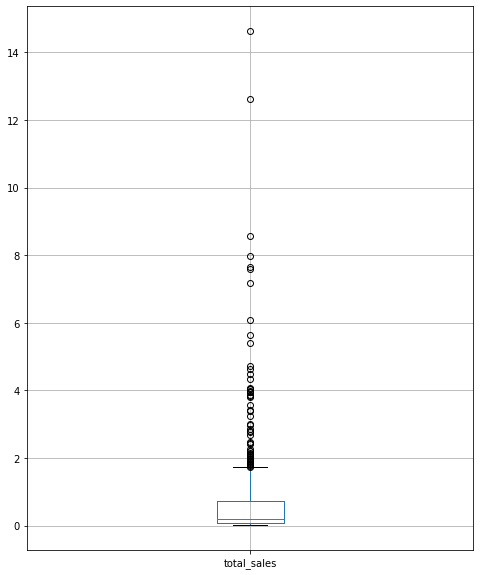

In [43]:
data_2013[data_2013['platform'] == 'PS4'].boxplot('total_sales', figsize=(8,10))
    #set_ylim(0,0.8)
    #plt.show()

<AxesSubplot:>

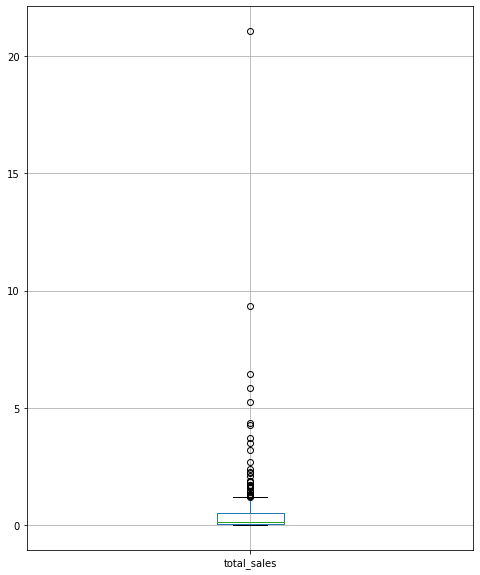

In [44]:
data_2013[data_2013['platform'] == 'PS3'].boxplot('total_sales', figsize=(8,10))

<AxesSubplot:>

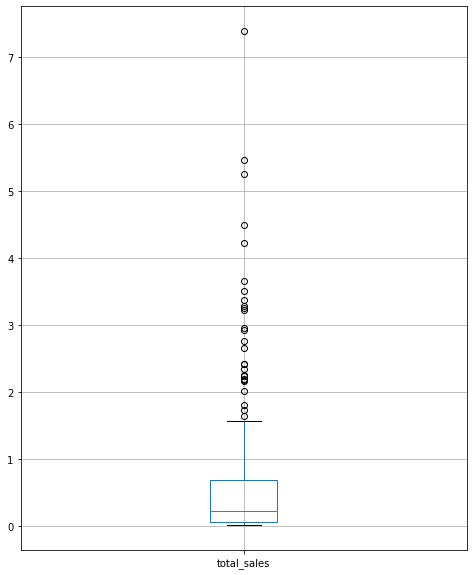

In [45]:
data_2013[data_2013['platform'] == 'XOne'].boxplot('total_sales', figsize=(8,10))

<AxesSubplot:>

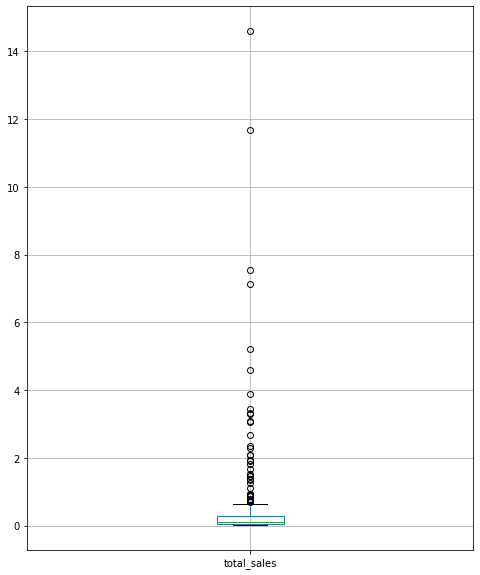

In [46]:
data_2013[data_2013['platform'] == '3DS'].boxplot('total_sales', figsize=(8,10))

<AxesSubplot:>

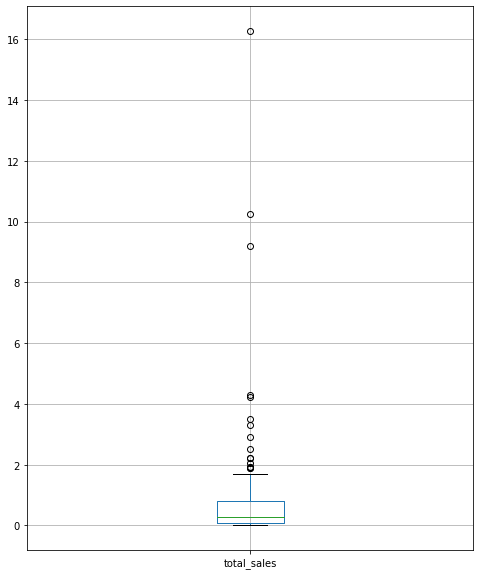

In [47]:
data_2013[data_2013['platform'] == 'X360'].boxplot('total_sales', figsize=(8,10))

По графику делаем выводы по количеству продаж Топ-5 платформ: ['PS4', 'PS3', 'XOne', '3DS', 'X360']:
 
 - платформа PS2 - игры этой платформы в основном были проданы в количестве от 0 - 1 млн. проданных копий
 - платформа 'PS3' - от 0 - 0.5 млн. проданных копий
 - платформа 'XOne' - от 0 - 0.8 млн. проданных копий
 - платформа '3DS' - от 0 - 0.3 млн. проданных копий
 - платформа 'X360' - от 0 - 0.9 млн. проданных копий
 
 То есть среди ТОП-5 платформ так же можно выделить лидеров по качеству проданных игр - это платформы: X360 и PS2.

#### Как влияют на продажи отзывы пользователей и критиков. 

Посмотрим, как влияют на продажи внутри одной популярной платформы - X360, отзывы пользователей и критиков. 

In [48]:
list_X360 = ['X360']

data_X360 = data_2013.query('platform in @list_X360')
data_X360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,nan,nan,nan,9.18
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,nan,4.9,M,4.28
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22


In [49]:
data_X360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 23 to 16654
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             186 non-null    object 
 1   platform         186 non-null    object 
 2   year_of_release  186 non-null    float64
 3   genre            186 non-null    object 
 4   na_sales         186 non-null    float64
 5   eu_sales         186 non-null    float64
 6   jp_sales         186 non-null    float64
 7   other_sales      186 non-null    float64
 8   critic_score     186 non-null    object 
 9   user_score       186 non-null    object 
 10  rating           186 non-null    object 
 11  total_sales      186 non-null    float64
dtypes: float64(6), object(6)
memory usage: 18.9+ KB


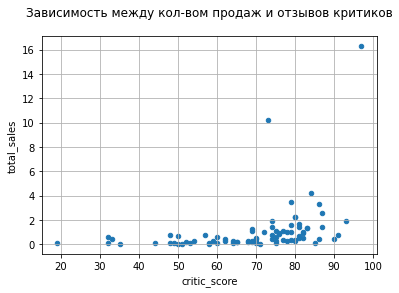

In [50]:
#построим диаграмму рассеяния
data_X360.plot(x='critic_score', y='total_sales', kind='scatter', grid=True) 
_= plt.title('Зависимость между кол-вом продаж и отзывов критиков', pad =20)


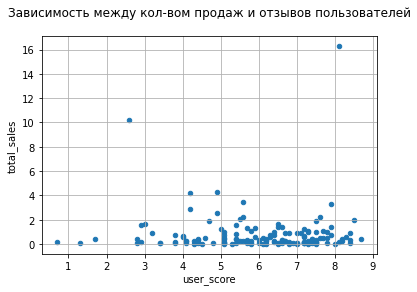

In [51]:
#построим диаграмму рассеяния
data_X360.plot(x='user_score', y='total_sales', kind='scatter', grid=True) 
_= plt.title('Зависимость между кол-вом продаж и отзывов пользователей', pad =20)

Теперь посчитаем корреляцию между отзывами и продажами платформы - X360. 

In [52]:
data_X360['critic_score'] = data_X360['critic_score'].astype(float)
data_X360['user_score'] = data_X360['user_score'].astype(float)
data_X360.corr()

/tmp/ipykernel_53/3127532558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_X360['critic_score'] = data_X360['critic_score'].astype(float)
/tmp/ipykernel_53/3127532558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_X360['user_score'] = data_X360['user_score'].astype(float)


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.218293,-0.203537,-0.285360,-0.218199,-0.245439,-0.248736,-0.220495
na_sales,-0.218293,1.000000,0.866574,0.634340,0.985236,0.342724,-0.012298,0.984299
eu_sales,-0.203537,0.866574,1.000000,0.612002,0.934769,0.336418,-0.009435,0.941008
jp_sales,-0.285360,0.634340,0.612002,1.000000,0.641529,0.290613,0.112592,0.648860
other_sales,-0.218199,0.985236,0.934769,0.641529,1.000000,0.349204,-0.018868,0.998640
critic_score,-0.245439,0.342724,0.336418,0.290613,0.349204,1.000000,0.520946,0.350345
user_score,-0.248736,-0.012298,-0.009435,0.112592,-0.018868,0.520946,1.000000,-0.011742
total_sales,-0.220495,0.984299,0.941008,0.648860,0.998640,0.350345,-0.011742,1.000000


Итак, по графикам и матрице корреляции можно сделать вывод о платформе X360: нет зависимости продаж от количества отзывов критиков (совсем небольшой процент) или пользователей (вообще отрицательный показатель). 

Подтвердим или опровергнем подобные выводы на любой рандомной платформе, например PS4.

In [53]:
list_PS4 = ['PS4']
data_PS4 = data_2013.query('platform in @list_PS4')
data_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,nan,nan,nan,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,nan,nan,nan,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [54]:
data_PS4['critic_score'] = data_PS4['critic_score'].astype(float)
data_PS4['user_score'] = data_PS4['user_score'].astype(float)


/tmp/ipykernel_53/1984970452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_PS4['critic_score'] = data_PS4['critic_score'].astype(float)
/tmp/ipykernel_53/1984970452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_PS4['user_score'] = data_PS4['user_score'].astype(float)


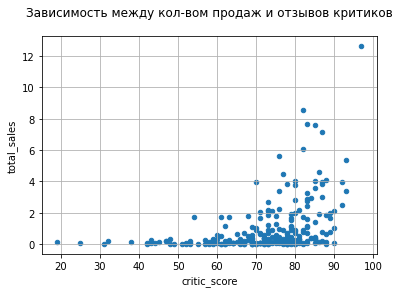

In [55]:
#построим диаграмму рассеяния
data_PS4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True) 
_= plt.title('Зависимость между кол-вом продаж и отзывов критиков', pad =20)


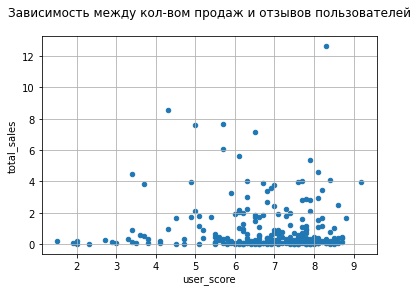

In [56]:
#построим диаграмму рассеяния
data_PS4.plot(x='user_score', y='total_sales', kind='scatter', grid=True) 
_= plt.title('Зависимость между кол-вом продаж и отзывов пользователей', pad =20)


In [57]:
data_PS4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Выше сказанные выводы так же подтвердились и на этой платформе.

#### Распределение по жанрам.

Посмотрим на общее распределение игр по жанрам. 

In [58]:
data_genre = data_2013.pivot_table(index='genre', values='name', aggfunc='count')\
.sort_values('name', ascending=False)
data_genre

,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


Лидерами по популярности являются жанры: Action, Role-Playing, Adventure. Меньше всего по количеству игр: Simulation, Strategy, Puzzle	 

Выделим жанры с высокими и низкими продажами, сравнивая медианные значения продаж, так как за высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами и анализ медианных показателей позволит найти жанр, который приносит высокий доход.

In [59]:
data_genre_sales = data_2013\
.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values('total_sales', ascending=False)
data_genre_sales

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Лидерами по продажам являются жанры: Shooter, Sports, Platform. Меньше всего продавались игры жанров: Strategy, Puzzle, Adventure.   

Сравнивая лидеров и аутсайдеров по количеству и продажам, видно, что они разные.

## Портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Различия в долях продаж.
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5)

In [60]:
data_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,nan,nan,nan,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,nan,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [61]:
#сгруппируем по платформам и посчитаем суммарные продажи по регионам
data_platform_sales = data_2013.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']]\
.agg(['sum']).reset_index()

#переименуем столбцы
data_platform_sales.columns = ['platform','na_sales', 'eu_sales', 'jp_sales', 'total_sales'] 
data_platform_sales

,platform,na_sales,eu_sales,jp_sales,total_sales
0,3DS,38.20,30.96,67.81,143.25
1,DS,0.57,0.85,0.00,1.54
2,PC,11.11,25.36,0.00,39.43
3,PS3,63.50,67.81,23.35,181.43
4,PS4,108.74,141.09,15.96,314.14
5,PSP,0.00,0.17,3.29,3.50
6,PSV,5.04,6.10,18.59,32.99
7,Wii,6.56,5.93,0.05,13.66
8,WiiU,29.21,19.85,10.88,64.63
9,X360,81.66,42.52,0.51,136.80


Найдем доли продаж по регионам и выделим их в отдельные столбецы.

In [62]:
data_platform_sales['na_sales_share'] \
= round(((data_platform_sales['na_sales'] / data_platform_sales['total_sales'])*100), 2)


In [63]:
data_platform_sales['eu_sales_share'] \
= round(((data_platform_sales['eu_sales'] / data_platform_sales['total_sales'])*100), 2)


In [64]:
data_platform_sales['jp_sales_share'] \
= round(((data_platform_sales['jp_sales'] / data_platform_sales['total_sales'])*100), 2)
data_platform_sales.head()

,platform,na_sales,eu_sales,jp_sales,total_sales,na_sales_share,eu_sales_share,jp_sales_share
0,3DS,38.20,30.96,67.81,143.25,26.67,21.61,47.34
1,DS,0.57,0.85,0.00,1.54,37.01,55.19,0.00
2,PC,11.11,25.36,0.00,39.43,28.18,64.32,0.00
3,PS3,63.50,67.81,23.35,181.43,35.00,37.38,12.87
4,PS4,108.74,141.09,15.96,314.14,34.62,44.91,5.08


Найдем ТОП-5 платформ в разбивке по регионам.

In [65]:
#na_sales
data_platform_sales.sort_values('na_sales', ascending=False).head()


,platform,na_sales,eu_sales,jp_sales,total_sales,na_sales_share,eu_sales_share,jp_sales_share
4,PS4,108.74,141.09,15.96,314.14,34.62,44.91,5.08
10,XOne,93.12,51.59,0.34,159.32,58.45,32.38,0.21
9,X360,81.66,42.52,0.51,136.80,59.69,31.08,0.37
3,PS3,63.50,67.81,23.35,181.43,35.00,37.38,12.87
0,3DS,38.20,30.96,67.81,143.25,26.67,21.61,47.34


In [66]:
#eu_sales
data_platform_sales.sort_values('eu_sales', ascending=False).head()

,platform,na_sales,eu_sales,jp_sales,total_sales,na_sales_share,eu_sales_share,jp_sales_share
4,PS4,108.74,141.09,15.96,314.14,34.62,44.91,5.08
3,PS3,63.50,67.81,23.35,181.43,35.00,37.38,12.87
10,XOne,93.12,51.59,0.34,159.32,58.45,32.38,0.21
9,X360,81.66,42.52,0.51,136.80,59.69,31.08,0.37
0,3DS,38.20,30.96,67.81,143.25,26.67,21.61,47.34


In [67]:
#jp_sales
data_platform_sales.sort_values('jp_sales', ascending=False).head()

,platform,na_sales,eu_sales,jp_sales,total_sales,na_sales_share,eu_sales_share,jp_sales_share
0,3DS,38.20,30.96,67.81,143.25,26.67,21.61,47.34
3,PS3,63.50,67.81,23.35,181.43,35.00,37.38,12.87
6,PSV,5.04,6.10,18.59,32.99,15.28,18.49,56.35
4,PS4,108.74,141.09,15.96,314.14,34.62,44.91,5.08
8,WiiU,29.21,19.85,10.88,64.63,45.20,30.71,16.83


Итак, ТОП-5 платформ:

в Северной Америке:
- PS4,
- XOne,
- X360,
- PS3,
- 3DS

в Европе:
- PS4,
- PS3,
- XOne,
- X360,
- 3DS

в Японии:
- 3DS,
- PS3,
- PSV,
- PS4,
- WiiU

Рассматривая ТОП-5 платформ, видно, что платформы, входящие в ТОП, в принципе похожи во всех регионах. Отличие платформа - PSV и WiiU - популярная в Японии. Анализируя доли продаж по этим группам, видно, что лидером является Европа - часто почти половина продаж, исключение - платформа 3DS - половина продаж, которой приходится на Японию.   

### Самые популярные жанры (топ-5).

In [68]:
#сгруппируем по жанрам и посчитаем суммарные продажи по регионам
data_genre_sales = data_2013.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']]\
.agg(['sum']).reset_index()

#переименуем столбцы
data_genre_sales.columns = ['genre','na_sales', 'eu_sales', 'jp_sales', 'total_sales'] 
data_genre_sales

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,126.05,118.13,40.49,321.87
1,Adventure,7.14,8.25,5.82,23.64
2,Fighting,15.55,8.55,7.65,35.31
3,Misc,27.49,20.04,9.20,62.82
4,Platform,18.14,15.58,4.79,42.63
5,Puzzle,0.83,1.00,1.18,3.17
6,Racing,12.96,20.19,2.30,39.89
7,Role-Playing,46.40,36.97,51.04,145.89
8,Shooter,109.74,87.86,6.61,232.98
9,Simulation,4.86,10.92,4.52,21.76


Найдем самые популярные жанры ТОП-5 в разбивке по регионам.

In [69]:
#na_sales
data_genre_sales.sort_values('na_sales', ascending=False).head()

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,126.05,118.13,40.49,321.87
8,Shooter,109.74,87.86,6.61,232.98
10,Sports,65.27,60.52,5.41,150.65
7,Role-Playing,46.40,36.97,51.04,145.89
3,Misc,27.49,20.04,9.20,62.82


In [70]:
#eu_sales
data_genre_sales.sort_values('eu_sales', ascending=False).head()

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,126.05,118.13,40.49,321.87
8,Shooter,109.74,87.86,6.61,232.98
10,Sports,65.27,60.52,5.41,150.65
7,Role-Playing,46.40,36.97,51.04,145.89
6,Racing,12.96,20.19,2.30,39.89


In [71]:
#jp_sales
data_genre_sales.sort_values('jp_sales', ascending=False).head()

,genre,na_sales,eu_sales,jp_sales,total_sales
7,Role-Playing,46.40,36.97,51.04,145.89
0,Action,126.05,118.13,40.49,321.87
3,Misc,27.49,20.04,9.20,62.82
2,Fighting,15.55,8.55,7.65,35.31
8,Shooter,109.74,87.86,6.61,232.98


Итак, ТОП-5 жанров:

в Северной Америке:
- Action,
- Shooter,
- Sports,
- Role-Playing,
- Misc

в Европе:
- Action,
- Shooter,
- Sports,
- Role-Playing,
- Racing

в Японии:
- Role-Playing,
- Action,
- Misc,
- Fighting,
- Shooter

Заметно почти абсолютное совпадение жанров группы ТОП-5 в Северной Америке и Европе. Набор ТОП-5 жанров  Японии похож, но в эту группу еще попал жанр Fighting - так же популярный в Японии. Скорее всего это связаны со сходством и различием культур населения этих регионов.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [72]:
data_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,nan,nan,nan,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,nan,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [73]:
#сгруппируем по рейтингу и посчитаем суммарные продажи по регионам
data_rating = data_2013.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']]\
.agg(['sum']).reset_index()

#переименуем столбцы
data_rating.columns = ['rating','na_sales', 'eu_sales', 'jp_sales', 'total_sales'] 
data_rating

,rating,na_sales,eu_sales,jp_sales,total_sales
0,E,79.05,83.36,15.14,200.16
1,E10+,54.24,42.69,5.89,115.39
2,M,165.21,145.32,14.11,371.68
3,T,49.79,41.95,20.59,126.62
4,nan,89.42,78.91,85.05,276.84


Найдем какие группы рейтинга показывают больше продаж в разных регионах.

In [74]:
#na_sales
data_rating.sort_values('na_sales', ascending=False)

,rating,na_sales,eu_sales,jp_sales,total_sales
2,M,165.21,145.32,14.11,371.68
4,nan,89.42,78.91,85.05,276.84
0,E,79.05,83.36,15.14,200.16
1,E10+,54.24,42.69,5.89,115.39
3,T,49.79,41.95,20.59,126.62


In [75]:
#eu_sales
data_rating.sort_values('eu_sales', ascending=False)

,rating,na_sales,eu_sales,jp_sales,total_sales
2,M,165.21,145.32,14.11,371.68
0,E,79.05,83.36,15.14,200.16
4,nan,89.42,78.91,85.05,276.84
1,E10+,54.24,42.69,5.89,115.39
3,T,49.79,41.95,20.59,126.62


In [76]:
#jp_sales
data_rating.sort_values('jp_sales', ascending=False)

,rating,na_sales,eu_sales,jp_sales,total_sales
4,nan,89.42,78.91,85.05,276.84
3,T,49.79,41.95,20.59,126.62
0,E,79.05,83.36,15.14,200.16
2,M,165.21,145.32,14.11,371.68
1,E10+,54.24,42.69,5.89,115.39


Итак, выберем так же 5 групп рейтинга, которые показали больше продаж:

в Северной Америке:

Большое количество игр осталось без оценки возрастного рейтинга - 78,91 млн. проданных копий.

- М («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.)
- Е («Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.)
- E10+ («Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.)
- Т («Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.)


в Европе:

Так же большое количество игр без оценки возрастного рейтинга - 89,42 млн. проданных копий.

- М
- Е
- E10+
- Т


в Японии:

Количество игр без возрастного рейтинга - 85,05 млн. проданных копий.

- Т
- Е
- М
- E10+


То есть можно сказать, что популярность игр по возрастному рейтингу игр в регионах практически одинакова. 

### Проверка гипотез.

#### Гипотеза 1:

"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

1) Сформулируем нулевую гипотезу (Н0):

"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые."

2) Альтернативная гипотеза (Н1):

"Средние пользовательские рейтинги платформ Xbox One и PC разные."

In [77]:
#рассчитаем средний пользовательский рейтинг на платформе Xbox One

list_XOne = ['XOne']
data_2013.query('platform in @list_XOne').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,nan,nan,nan,7.39
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [78]:
mediam_user_score_XOne = data_2013.query('platform in @list_XOne')['user_score'].median()
mediam_user_score_XOne

6.8

In [79]:
#рассчитаем средний пользовательский рейтинг на платформе PC

list_PC = ['PC']
data_2013.query('platform in @list_PC').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014.0,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1095,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
1351,SimCity (2013),PC,2013.0,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
1437,Battlefield 4,PC,2013.0,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
1530,Fallout 4,PC,2015.0,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28


In [80]:
mediam_user_score_PC = data_2013.query('platform in @list_PC')['user_score'].median()
mediam_user_score_PC

6.8

Для проверки гипотезы  равенства средних пользовательских рейтингов платформ Xbox One и PC воспользуемся специальным методом: st.ttest_ind  

In [81]:

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    data_2013.query('platform in @list_XOne and user_score != "nan"')['user_score'], 
    data_2013.query('platform in @list_PC and user_score != "nan"')['user_score'],\
    equal_var = False, nan_policy = 'omit') 
#агрумент nan_policy = 'omit' дает возможность обойти nan

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.1475959401343034
Не получилось отвергнуть нулевую гипотезу


Итак, средние пользовательские рейтинги платформ Xbox One и PC можно считать одинаковые. 

#### Гипотеза 2:

"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."

1) Сформулируем нулевую гипотезу (Н0):

"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые."

2) Альтернативная гипотеза (Н1):

"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."

In [82]:
data_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,nan,nan,nan,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,nan,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [83]:
#рассчитаем средний пользовательский рейтинг жанра Action

list_Action = ['Action']
data_2013.query('genre in @list_Action').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
149,The Last of Us,PS3,2013.0,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47


In [84]:
mediam_user_score_Action = data_2013\
.query('genre in @list_Action')['user_score'].median()
mediam_user_score_Action

7.1

In [85]:
#рассчитаем средний пользовательский рейтинг жанра Action

list_Sports = ['Sports']
data_2013.query('genre in @list_Sports').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,nan,4.5,E,4.28


In [86]:
mediam_user_score_Sports = data_2013\
.query('genre in @list_Sports')['user_score'].median()
mediam_user_score_Sports

5.5

Для проверки гипотезы равенства средних пользовательских рейтингов платформ Xbox One и PC воспользуемся специальным методом: st.ttest_ind

In [87]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    data_2013.query('genre in @list_Action and user_score != "nan"')['user_score'], 
    data_2013.query('genre in @list_Sports and user_score != "nan"')['user_score'], equal_var = False, nan_policy = 'omit') 
#агрумент nan_policy = 'omit' дает возможность обойти nan

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4460039700700163e-20
Отвергаем нулевую гипотезу


Итак, проверив гипотезы, пришли к выводу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

## ОБЩИЕ ВЫВОДЫ:

Нами быд проведен анализ данных (за 2016г.) интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 

1. В начале исследования была проведена предподготовка данных: проверка наличия пропуков, дубликатов, проверка типа данных и приведения некоторых к нужному виду.


2. Далее был проведен анализ существующих платформ. Который дал следующие результаты:

- делая прогноз на 2017 год, приходим к выводу, что платформы, которые запустили в 2013 году - 2017 должны достичь своего пика. Поэтому актуальный период определим с 2013-2017 гг. И дальнейшее исследование проходило на данных актуального периода, то есть с 2013 года.

- по количеству продаж Топ-5 платформ: 'PS4', 'PS3', 'XOne', '3DS', 'X360' имеют показатели:

    - платформа PS2 - игры этой платформы в основном были проданы в количестве от 0 - 1 млн. проданных копий
 - платформа 'PS3' - от 0 - 0.5 млн. проданных копий
 - платформа 'XOne' - от 0 - 0.8 млн. проданных копий
 - платформа '3DS' - от 0 - 0.3 млн. проданных копий
 - платформа 'X360' - от 0 - 0.9 млн. проданных копий
 
 То есть среди ТОП-5 платформ так же можно выделить лидеров по качеству проданных игр - это платформы: X360 и PS2.

- проведя выборочную проверку платформ выяснили, что нет зависимости продаж от количества отзывов критиков или пользователей. 

- сравнивая, в разбивке по жанрам, лидеров и аутсайдеров по количеству и продажам , видно, что они почти совпадают, а именно:
    Лидерами по популярности являются жанры: Action, Role-Playing, Adventure. Меньше всего по количеству игр: Simulation, Strategy, Puzzle.	
    Лидерами по продажам являются жанры: Shooter, Sports, Platform. Меньше всего продавались игры жанров: Strategy, Puzzle, Adventure.      
    
3. Так же определили примерный портрет пользователя каждого региона (NA, EU, JP) и сравнительная характеристика дала следующее:

- Рассматривая ТОП-5 платформ, видно, что платформы, входящие в ТОП, в принципе похожи во всех регионах. Отличие платформа - PSV и WiiU - популярная в Японии. Анализируя доли продаж по этим группам, видно, что лидером является Европа - часто почти половина продаж, исключение - платформа 3DS - половина продаж, которой приходится на Японию.   

Итак, ТОП-5 платформ:

в Северной Америке:
- PS4,
- XOne,
- X360,
- PS3,
- 3DS

в Европе:
- PS4,
- PS3,
- XOne,
- X360,
- 3DS

в Японии:
- 3DS,
- PS3,
- PSV,
- PS4,
- WiiU


- Заметно почти абсолютное совпадение жанров группы ТОП-5 в Северной Америке и Европе. Набор ТОП-5 жанров  Японии похож, но в эту группу еще попал жанр Fighting - так же популярный в Японии. Скорее всего это связаны со сходством и различием культур населения этих регионов.

Итак, ТОП-5 жанров:

в Северной Америке:
- Action,
- Shooter,
- Sports,
- Role-Playing,
- Misc

в Европе:
- Action,
- Shooter,
- Sports,
- Role-Playing,
- Racing

в Японии:
- Role-Playing,
- Action,
- Misc,
- Fighting,
- Shooter

- То есть можно сказать, что популярность игр по возрастному рейтингу игр в регионах практически одинакова. 

в Северной Америке:

Большое количество игр осталось без оценки возрастного рейтинга - 78,91 млн. проданных копий.

- М («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.)
- Е («Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.)
- E10+ («Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.)
- Т («Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.)


в Европе:

Так же большое количество игр без оценки возрастного рейтинга - 89,42 млн. проданных копий.

- М
- Е
- E10+
- Т


в Японии:

Количество игр без возрастного рейтинга - 85,05 млн. проданных копий.

- Т
- Е
- М
- E10+


4. Также были проверены и приняты гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC можно считать одинаковые. 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 



### РЕКОМЕНДАЦИИ:

Учитывая вышесказанное, можем сформулировать рекомендации, которые позволят сделать ставки на потенциально популярные ТОП-продуктов и спланировать рекламные кампании.

К таким ТОП- продуктам мы смогли отнести:

Платформы:
'PS4', 'PS3', 'XOne', '3DS', 'X360'.

Жанры:
по количеству игр - Action, Role-Playing, Adventure 
по количеству продаж - Shooter, Sports, Platform.

По рейтингу: М, Е, E10+, Т.
